In [25]:
import pandas as pd
import numpy as np
import os

# https://www.kaggle.com/mlg-ulb/creditcardfraud
df = pd.read_csv(os.path.join(r'D:\joel\UDEMY -\datasets and codes\Notebooks\.ipynb_checkpoints\credit card fraud detection','creditcard.csv'))
#df = df.sample(frac=0.5) # taking only half, 100000+ observations
print (df.shape) 
df.sample(10) 
# the data is 142k+ with 31 variables.

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1103,856.0,-0.916706,0.749862,2.067662,0.095077,-0.237843,-0.342994,0.454653,0.012056,0.432845,...,0.216654,0.693767,-0.282403,0.410592,0.089231,-0.469512,-0.127948,0.162297,23.90,0
114069,73318.0,1.072692,-0.422528,1.155739,0.919267,-1.246420,-0.307343,-0.628867,0.124617,1.099176,...,-0.071421,-0.195288,-0.004581,0.399829,0.195568,0.314608,-0.001257,0.034567,64.99,0
66115,51891.0,1.145871,-0.818318,-0.508969,-0.870187,-0.286127,-0.200415,0.039603,-0.195839,-1.437342,...,-0.726268,-2.028065,-0.014370,-0.831178,0.084221,0.659150,-0.105168,0.015765,165.77,0
256239,157599.0,1.047242,1.353242,-0.924665,4.392620,1.325511,0.811075,0.504143,-0.941382,-2.216409,...,0.931103,0.356545,-0.268087,-1.009515,0.291170,0.601654,0.276006,0.310104,5.67,0
131329,79560.0,-1.495878,-0.110197,2.087015,0.794803,0.789355,-0.018492,0.861912,-0.236785,0.015249,...,-0.143256,0.114577,-0.090219,0.191126,0.480432,-0.368405,-0.481459,-0.295380,55.14,0
143041,85085.0,1.276242,0.600297,-0.822541,0.969272,0.652839,-0.273613,0.144543,0.008697,-0.179476,...,-0.099549,-0.272571,-0.273729,-1.000383,0.796074,-0.269842,0.026066,0.034069,1.00,0
255805,157409.0,1.886254,-0.200749,-0.291641,1.605199,-0.429732,-0.282542,-0.214588,-0.020819,1.163223,...,-0.505416,-1.189026,0.426356,-0.094930,-0.338917,-1.104535,0.054636,-0.027043,27.89,0
228513,145544.0,-0.643139,0.323888,-0.253890,-0.229861,-0.320347,-0.337035,0.016371,0.511599,0.664531,...,0.264600,0.641559,0.167731,0.639755,-0.782464,0.447755,-0.108167,0.041705,100.22,0
203397,134801.0,-0.117056,0.359218,0.487520,-1.019267,0.891565,-1.095920,1.007438,-0.268784,-0.012522,...,0.285025,0.882999,-0.367904,0.008109,0.427193,-0.241444,-0.231696,-0.292665,1.00,0
40435,40237.0,-0.383331,0.380261,1.844116,1.023847,0.304482,1.594393,0.356476,0.363402,-0.089204,...,-0.031282,0.330656,0.108685,-0.612635,-0.678828,0.559806,0.007413,-0.109179,45.51,0


In [26]:
# all variables except time have been kept anonymous-named, maybe even normalized/encrypted for security reasons
# let's first observe the column types
df.dtypes
# all are float64 values

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [27]:
# let's see what are the proportions of either 'fraud: 1' or 'normal: 0' transaction
print (df['Class'].value_counts())
zero = df['Class'].value_counts()[0]
one = df['Class'].value_counts()[1]
total = df.shape[0]
zero_count = zero/total
print ('Normal transactions 0: ',zero_accuracy,' %')
one_count = one/total
print ('Fraud transactions 1: ',one_accuracy,' %')

# we can see very high chances of predicting - regular '0' transaction and less than 1 % for fraud transactions '1'
# here we need to understand what is our priority, obviously we want perfect classification
# but we can't let true transactions be classified as Fraud (FP- False Positive)
# also, we can't let fraud transactions be classified as True (FN - False Negative)
# we'll use the SMOTE algorithm to balance the dataset

0    284315
1       492
Name: Class, dtype: int64
Normal transactions 0:  0.9983427431813713  %
Fraud transactions 1:  0.0016572568186286902  %


In [28]:
# let's check for missing values
(df.isnull().sum()/df.shape[0])*100 # no missing values

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

In [29]:
# let's work on removing outliers busing 'Pearson's' method
for i in df.columns[:-1]:
    print ('Outlier removal of: ',i)
    q25,q75 = np.percentile(df[i],[25,75])
    iqr = q75-q25
    maximum = q75+(iqr*1.5)
    minimum = q25- (iqr*1.5)
    df.loc[df[i]>maximum,i]=np.NaN
    df.loc[df[i]<minimum,i]=np.NaN
    
print (((df.isnull().sum())/df.shape[0])*100)    # check if any missing values after outlier removal
# all variables execpt 'Time' have missing values after outlier removal

Outlier removal of:  Time
Outlier removal of:  V1
Outlier removal of:  V2
Outlier removal of:  V3
Outlier removal of:  V4
Outlier removal of:  V5
Outlier removal of:  V6
Outlier removal of:  V7
Outlier removal of:  V8
Outlier removal of:  V9
Outlier removal of:  V10
Outlier removal of:  V11
Outlier removal of:  V12
Outlier removal of:  V13
Outlier removal of:  V14
Outlier removal of:  V15
Outlier removal of:  V16
Outlier removal of:  V17
Outlier removal of:  V18
Outlier removal of:  V19
Outlier removal of:  V20
Outlier removal of:  V21
Outlier removal of:  V22
Outlier removal of:  V23
Outlier removal of:  V24
Outlier removal of:  V25
Outlier removal of:  V26
Outlier removal of:  V27
Outlier removal of:  V28
Outlier removal of:  Amount
Time       0.000000
V1         2.479574
V2         4.749181
V3         1.180800
V4         3.914230
V5         4.316959
V6         8.063355
V7         3.141777
V8         8.473809
V9         2.908285
V10        3.334188
V11        0.273870
V12        5.38

In [30]:
# as we can see, there is a percentage of outliers removed, creating gaps of missing values
# let's impute them with median values
for i in df.columns[:-1]:
    df[i] = df[i].fillna(df[i].median())
print (((df.isnull().sum())/df.shape[0])*100)    # check if any missing values after imputation

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64


In [31]:
# Let's check if the continuous variables data we have is normalized or not
not_normal=[]
for i in df.columns[:-1]:
    maximum = max(df[i])
    minimum = min(df[i])
    if maximum<=1 and minimum>=0:
        print (i,' is normalized variable:',(minimum,maximum))
    else:
        print (i,' is not normalized variable: ',(minimum,maximum))
        not_normal.append(i)
                

Time  is not normalized variable:  (0.0, 172792.0)
V1  is not normalized variable:  (-4.27417798614728, 2.45492999121121)
V2  is not normalized variable:  (-2.70195970663999, 2.90710051046121)
V3  is not normalized variable:  (-3.7659863129308797, 3.89434617586827)
V4  is not normalized variable:  (-3.23578507961487, 3.13120389031877)
V5  is not normalized variable:  (-2.64676302942294, 2.56691565890406)
V6  is not normalized variable:  (-2.5185603739686404, 2.14884092526569)
V7  is not normalized variable:  (-2.24037801099331, 2.25665590347638)
V8  is not normalized variable:  (-1.01251404151921, 1.1313046817760202)
V9  is not normalized variable:  (-2.5033039699085498, 2.4573859927632404)
V10  is not normalized variable:  (-2.01936457370475, 1.9378932458538702)
V11  is not normalized variable:  (-3.01416266570016, 2.99131413562603)
V12  is not normalized variable:  (-1.94128022685225, 2.1524663716756898)
V13  is not normalized variable:  (-2.61508093972412, 2.6286328393237297)
V14  i

Time


C:\Users\joel\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


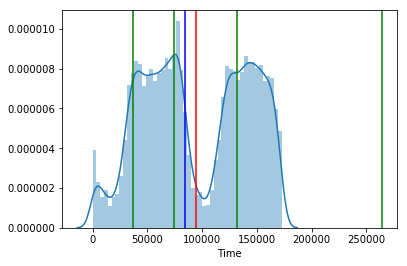



V1


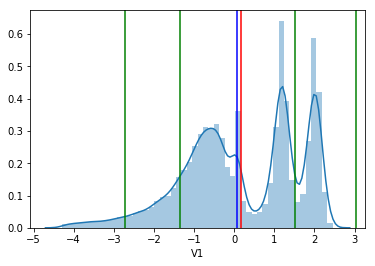



V2


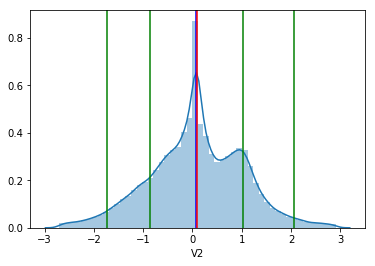



V3


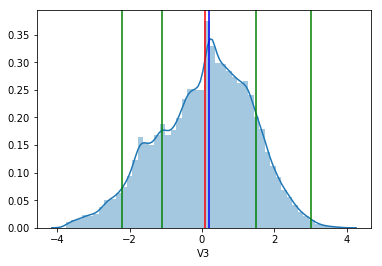



V4


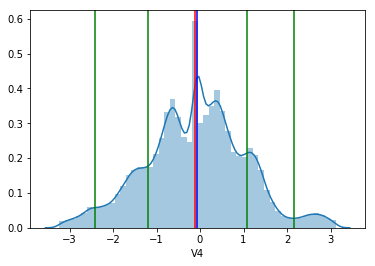



V5


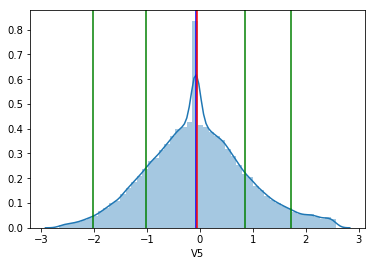



V6


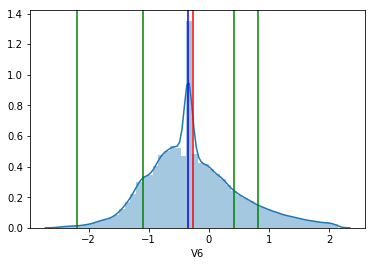



V7


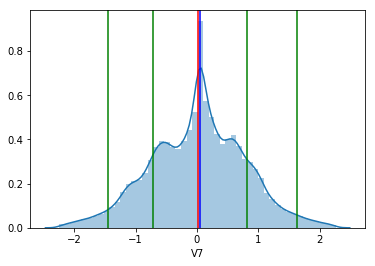



V8


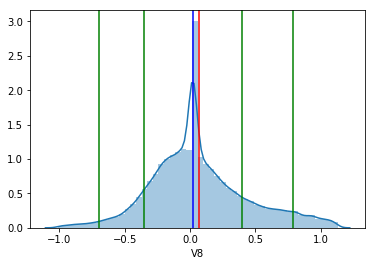



V9


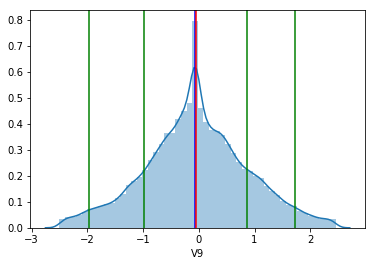



V10


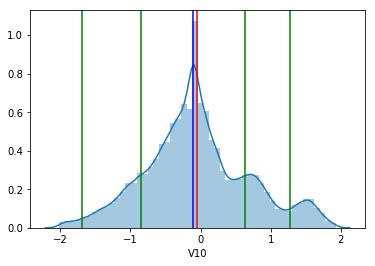



V11


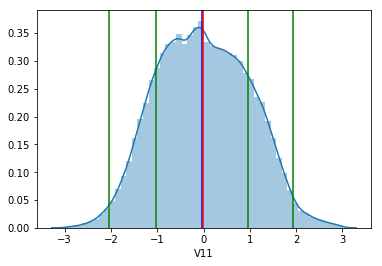



V12


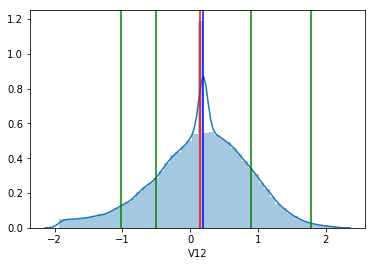



V13


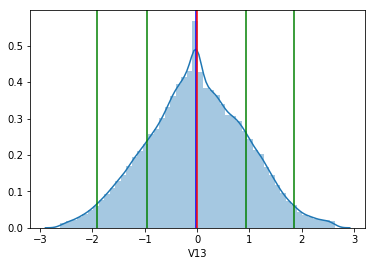



V14


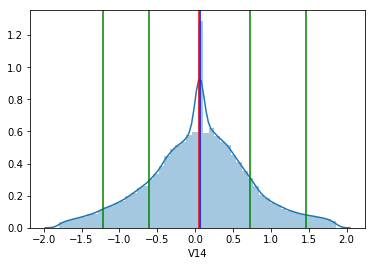



V15


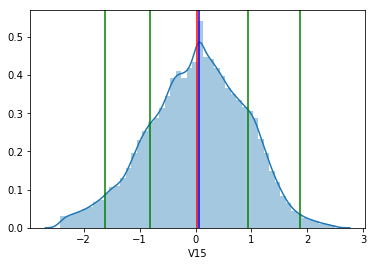



V16


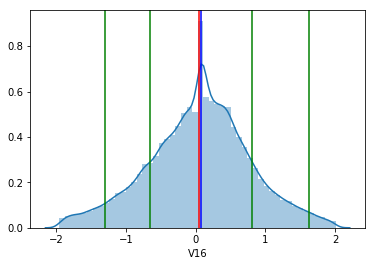



V17


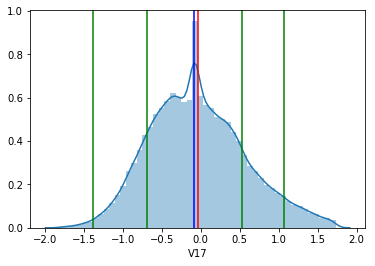



V18


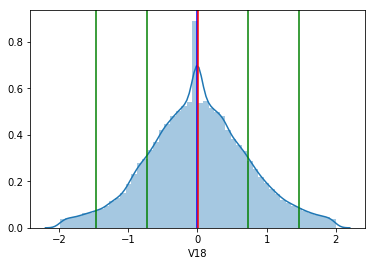



V19


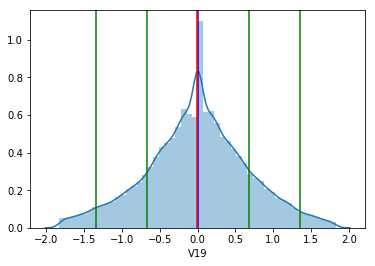



V20


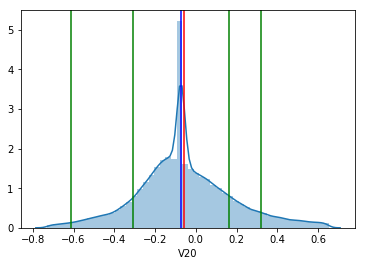



V21


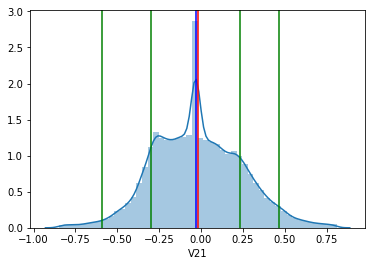



V22


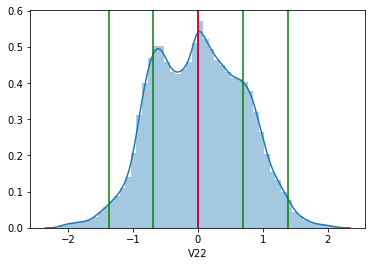



V23


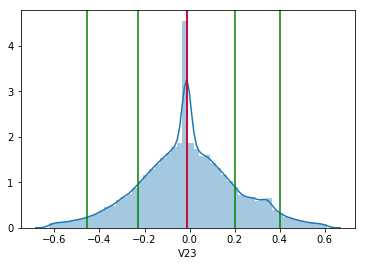



V24


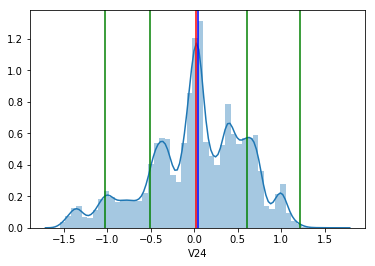



V25


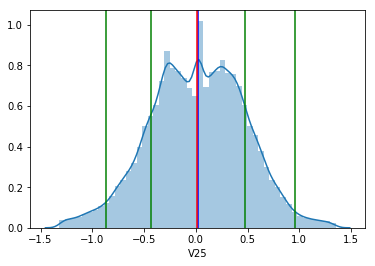



V26


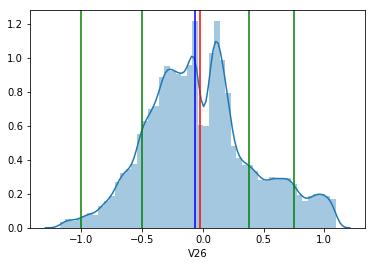



V27


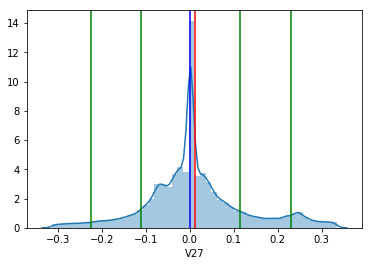



V28


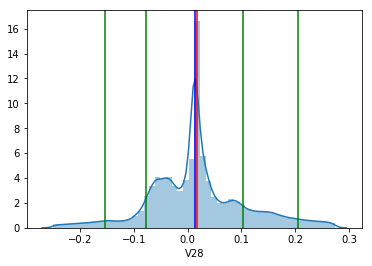



Amount


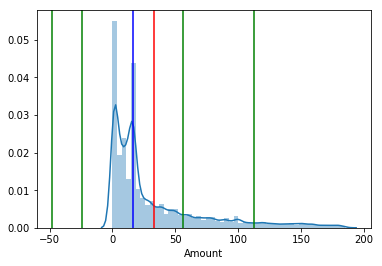

In [99]:
# let's have some visualizations for the distribution of data
from matplotlib import pyplot as plt
import seaborn as sns

for i in df.columns[:-1]:
    print (i)
    sns.distplot(df[i])
    plt.axvline(df[i].median(),color='b') # the median line
    plt.axvline(df[i].mean(),color='r') # mean line
    plt.axvline((df[i].median()-np.std(df[i])),color='g') # 1st standard deviation
    plt.axvline((df[i].median()+np.std(df[i])),color='g') # 1st standard deviation
    plt.axvline(2*(df[i].median()-np.std(df[i])),color='g') # 2nd standard deviation
    plt.axvline(2*(df[i].median()+np.std(df[i])),color='g') # 2nd standard deviation
    plt.show()
    print ('\n')

In [32]:
# most of the variables from time to v28 seem to be normaly distributed with many whose mean and median coinciding except 
# for the 'Amount' variable
# Let's normalize the data now for further analysis
for i in not_normal:
    df[i] = (df[i]-min(df[i]))/(max(df[i])-min(df[i]))
    print (i, 'max: ',max(df[i]),' min: ',min(df[i]))
    
df.sample(3)    

Time max:  1.0  min:  0.0
V1 max:  1.0  min:  0.0
V2 max:  1.0  min:  0.0
V3 max:  1.0  min:  0.0
V4 max:  1.0  min:  0.0
V5 max:  1.0  min:  0.0
V6 max:  1.0  min:  0.0
V7 max:  1.0  min:  0.0
V8 max:  1.0  min:  0.0
V9 max:  1.0  min:  0.0
V10 max:  1.0  min:  0.0
V11 max:  1.0  min:  0.0
V12 max:  1.0  min:  0.0
V13 max:  1.0  min:  0.0
V14 max:  1.0  min:  0.0
V15 max:  1.0  min:  0.0
V16 max:  1.0  min:  0.0
V17 max:  1.0  min:  0.0
V18 max:  1.0  min:  0.0
V19 max:  1.0  min:  0.0
V20 max:  1.0  min:  0.0
V21 max:  1.0  min:  0.0
V22 max:  1.0  min:  0.0
V23 max:  1.0  min:  0.0
V24 max:  1.0  min:  0.0
V25 max:  1.0  min:  0.0
V26 max:  1.0  min:  0.0
V27 max:  1.0  min:  0.0
V28 max:  1.0  min:  0.0
Amount max:  1.0  min:  0.0


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
122257,0.442706,0.350072,0.734985,0.753281,0.716001,0.419748,0.860743,0.349114,0.482945,0.691561,...,0.493612,0.293955,0.689952,0.487186,0.489759,0.334922,0.601122,0.500879,0.009322,0
264078,0.933238,0.593054,0.485280,0.566927,0.206552,0.863466,0.466254,0.283718,0.668571,0.632492,...,0.963121,0.397852,0.247305,0.702877,0.502042,0.416959,0.647053,0.742712,0.144661,0
13727,0.140886,0.824982,0.452627,0.380237,0.495757,0.882546,0.466254,0.319309,0.854484,0.863654,...,0.337190,0.383758,0.413375,0.803532,0.762821,0.701498,0.420511,0.472295,0.054201,0


In [33]:
# split the data into independent & dependent
X = df.drop('Class',axis=1)
y = df['Class']
print (X.shape,y.shape)

(284807, 30) (284807,)


In [34]:
# Let's create some synthetic datapoints for balancing the ratio of fraud vs normal transactions
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [36]:
fraud = df[df['Class']==1]
normal = df[df['Class']==0]
print (fraud.shape, normal.shape)

(492, 31) (284315, 31)


In [ ]:
ratio = round(normal.shape/fraud.shape)
ratio

In [ ]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(X,y)
print (X_res.shape, y_res.shape)

In [9]:
# let's perform ANOVA (analysis of Variance) test between the categorical-target and the independent numeric variables
numeric = list(df.columns[:-1]) # all the numeric variables
unrelated =[]#  list of variables  not-related to the target

from scipy import stats
for i in numeric:
    fStat, pVal = stats.f_oneway(df['Class'], df[i])
    print(i,' P-value: ',pVal,' f-statistic: ',fStat)
    if pVal<0.05:
        print ('There is a relationship between col: ',i,' and the target variable')
    else:
        print ('No relationship between col: ',i,' and the target variable')
        unrelated.append(i)
    print ('\n')    
        
print (unrelated) 
# ANOVA test shows there exists a relationship between these continuous variables and the target 'Class'

Time  P-value:  0.0  f-statistic:  550606.5992837742
There is a relationship between col:  Time  and the target variable


V1  P-value:  0.0  f-statistic:  1318852.0693784961
There is a relationship between col:  V1  and the target variable


V2  P-value:  0.0  f-statistic:  1167523.6199032054
There is a relationship between col:  V2  and the target variable


V3  P-value:  0.0  f-statistic:  1156838.2417874984
There is a relationship between col:  V3  and the target variable


V4  P-value:  0.0  f-statistic:  997819.2330168909
There is a relationship between col:  V4  and the target variable


V5  P-value:  0.0  f-statistic:  1043651.5930167927
There is a relationship between col:  V5  and the target variable


V6  P-value:  0.0  f-statistic:  1183097.331579129
There is a relationship between col:  V6  and the target variable


V7  P-value:  0.0  f-statistic:  1155678.7393485792
There is a relationship between col:  V7  and the target variable


V8  P-value:  0.0  f-statistic:  113066

[0.04306026 0.04267877 0.03085047 0.03826416 0.04480728 0.02736121
 0.0383465  0.03156811 0.02437188 0.03868469 0.02655046 0.0507576
 0.03579653 0.02709297 0.02791332 0.03333827 0.03066857 0.03923155
 0.04593029 0.03757063 0.02599292 0.03498888 0.02986358 0.02872084
 0.02909352 0.02996099 0.03080947 0.02092606 0.01814136 0.03665887]


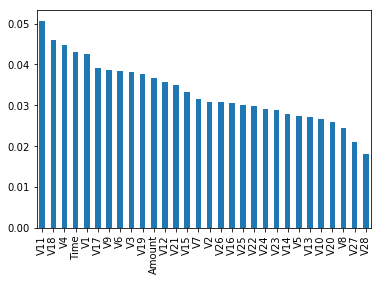

In [102]:
# Let's perform a feature importance test
# this test gives you a score for each feature of your data, the higher score shows more importance/relevance 
# of that feature towards your target variable
# it uses a tree-based classifiers approach

from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier

X = df[numeric]
y = df['Class']
importances = ExtraTreesClassifier().fit(X,y)
print (importances.feature_importances_)

# Let's look at the scores visually

values = pd.Series(importances.feature_importances_, index = numeric)
values.nlargest(30).plot(kind='bar')
plt.figsize=(10,15)
plt.show()
# V11 shows the highest relevance to the target
# with V4,V6,V3 and others so on in a decreasing manner, but looking at the horizontal scales and after doing an ANOVA analysis
# we shouldn't be removing any variable YET, because all of them more or less show some relationship to the target in ANOVA.
# we will decide after doing some further tests which ones to removing also considering the importance-values received from
# this test.

In [103]:
# source: https://towardsdatascience.com/feature-selection-using-regularisation-a3678b71e499
from sklearn.linear_model import Lasso, LogisticRegression # Lasso is L1 regularization
from sklearn.feature_selection import SelectFromModel

# fitting the feature selection model with the Logistic regression data
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1'))
X_train,X_test,Y_train,Y_test = train_test_split(df[numeric],df['Class'],test_size=0.33,random_state=42)
sel_.fit(df.iloc[:,:-1], df['Class'])
#sel_.fit(df[numeric], df['Class'])

# Visualising features that were kept by the lasso regularisation
print (sel_.get_support())

#  So True is for the features that lasso thought is important (non-zero features) 
# while False is for the features whose weights were shrinked to zero and are not important according to Lasso.


selected_feat = X_train.columns[(sel_.get_support())] # gives the remaining features

print (selected_feat)
# almost all variables are present except V13,V23 and V27, even the sklearn's feature importance module showed V13 and V23 in their
# least 10 important variables.
# V13 variable is shown to be removed(coeffecient turned to 0)
# what we will do is create another dataframe (without the V13,V23 and V27 variables, conclusion from the Lasso regression)
# later after the correlation analysis and apply 2 ML algorithms and compare which dataframe has better accuracy
# whether actually any overfitting has occured and did it get reduced by the Lasso feature selection method
# based on comparing those 2 dataframe metrics we'll decide which dataframe we'll further use for more algorithms.

[ True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True False
  True  True  True False  True  True]
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V24', 'V25', 'V26', 'V28', 'Amount'],
      dtype='object')


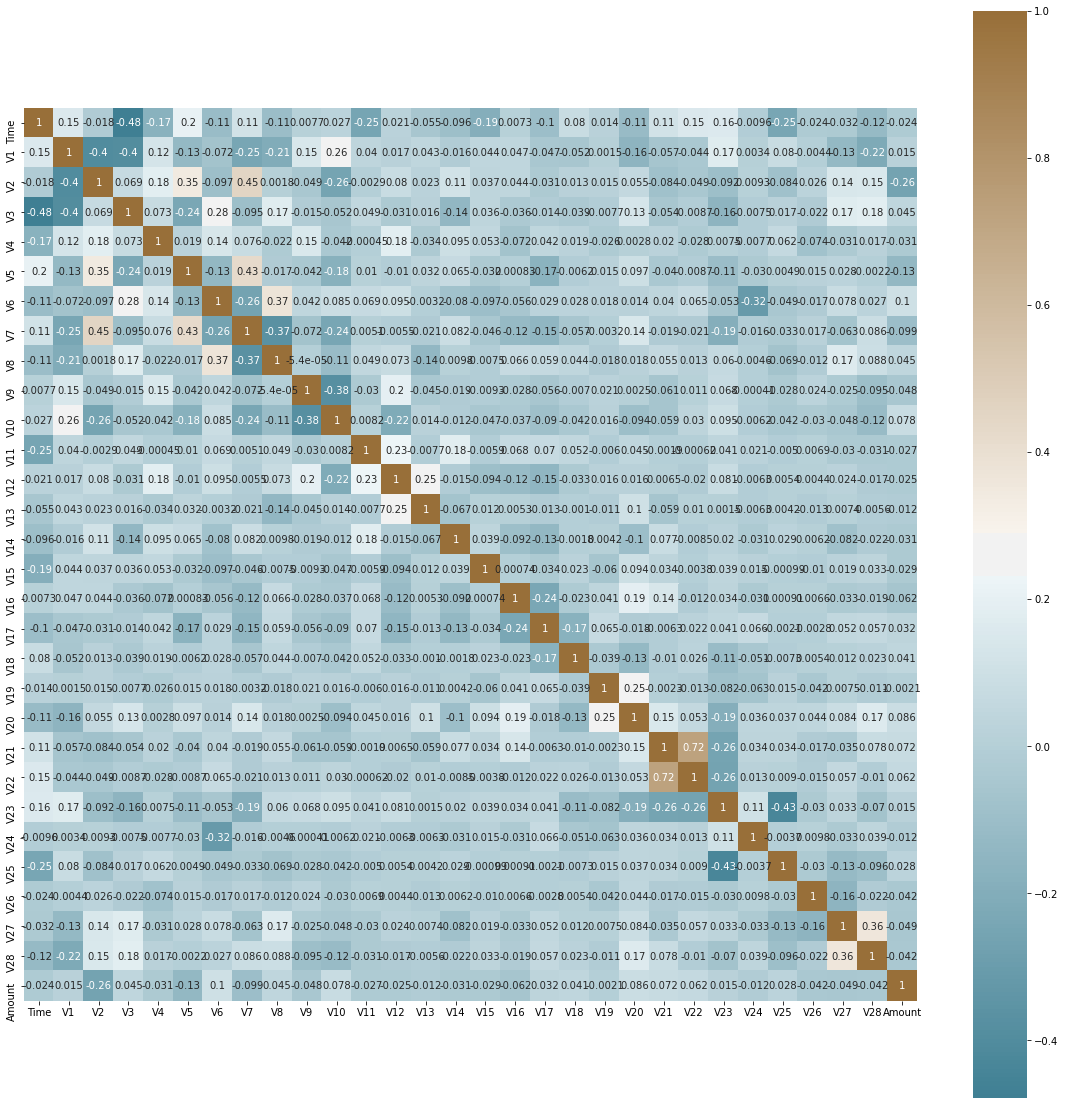

In [14]:
# as all independent variables being continous, let's perform correlation Analysis using heatmap
from matplotlib import pyplot as plt
import seaborn as sns
# the correlation table

corr = df[numeric].corr()
#Set the width and hieght of the plot

f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 50, as_cmap=True),
            square=True, ax=ax,annot = True)
plt.show()

In [15]:
# doing correlation analysis shows only 1 variable V21 shows a strong correlation to V22 by 72%
# we'll remove V21 
numeric.remove('V21')
df.drop(labels=['V21'],axis=1,inplace=True)
print (df.shape)

df2 = df.drop(labels=['V13','V23','V27'],axis=1)
numeric2 = [i for i in numeric if i not in ['V13','V23','V27']]
print (df2.shape)

(142404, 30)
(142404, 27)


In [127]:
df['Class'] = pd.Categorical(df['Class'])
df['Class'] = df['Class'].cat.codes
df['Class'] = df['Class'].astype('object')
print (df['Class'].dtype)

object


In [130]:
df['Class'] = df['Class'].astype('int')
df['Class'].unique()

array([0, 1], dtype=int64)

In [131]:
# Let's begin applying machine-learning models over the data
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,Y_train,Y_test = train_test_split(df[numeric],df['Class'],test_size=0.33,random_state=42) # original df split
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(df2[numeric2],df['Class'],test_size=0.33,random_state=42) # lasso df2 split

print ('Original DF split: ')
print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)

print ('df2 split: ')
print (X_train2.shape, Y_train2.shape)
print (X_test2.shape, Y_test2.shape)

def error_metric(y_true,y_preds):
    CM = pd.crosstab(y_true,y_preds) # the confusion matrix
    TN = CM.iloc[0,0]
    FN = CM.iloc[1,0]
    TP = CM.iloc[1,1]
    FP = CM.iloc[0,1]
    print ('accuracy score: ',accuracy_score(y_true, y_preds)*100,'%') #check accuracy of model
    print ('False-Negative-Rate: ',(FN*100)/(FN+TP),'%') #False Negative rate 
    print ('true-positive-rate: ',((TP+TN)*100)/(TP+TN+FP+FN),'%')

Original DF split: 
(95410, 29) (95410,)
(46994, 29) (46994,)
df2 split: 
(95410, 26) (95410,)
(46994, 26) (46994,)


In [158]:
# applying logistic-regression
# understanding the summary via the below source site
# https://www.accelebrate.com/blog/interpreting-results-from-linear-regression-is-the-data-appropriate/
from sklearn.linear_model import LogisticRegression

# OLS is the method which helps to calculate the co-efficients: b0, b1, b2, b3 and so on.
model = LogisticRegression().fit(X_train, Y_train) 
LR_preds = model.predict(X_test)
print (error_metric(Y_test,(LR_preds)))


# the lasso feature selection model
model2 = LogisticRegression().fit(X_train2, Y_train2) 
LR_preds2 = model2.predict(X_test2)
print (error_metric(Y_test2,(LR_preds2)))



accuracy score:  99.82338170830319 %
False-Negative-Rate:  97.61904761904762 %
true-positive-rate:  99.82338170830319 %
None
accuracy score:  99.82550963952845 %
False-Negative-Rate:  96.42857142857143 %
true-positive-rate:  99.82550963952845 %
None


In [152]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion='entropy').fit(X_train,Y_train)
DT_preds = DT_model.predict(X_test)
print(error_metric(Y_test,DT_preds))

DT_model2 = DecisionTreeClassifier(criterion='entropy').fit(X_train2,Y_train2)
DT_preds2 = DT_model2.predict(X_test2)
print (error_metric(Y_test2,DT_preds2))

accuracy score:  99.86168447035791 %
False-Negative-Rate:  47.61904761904762 %
true-positive-rate:  99.86168447035791 %
None
accuracy score:  99.86594033280845 %
False-Negative-Rate:  45.23809523809524 %
true-positive-rate:  99.86594033280845 %
None


In [154]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators=100).fit(X_train,Y_train)
RF_preds = RF_model.predict(X_test)
error_metric(Y_test,RF_preds)



accuracy score:  99.88934757628634 %
False-Negative-Rate:  61.904761904761905 %
true-positive-rate:  99.88934757628634 %


In [156]:
from sklearn.neighbors import KNeighborsClassifier
K_model = KNeighborsClassifier().fit(X_train,Y_train)
K_preds = K_model.predict(X_test)
error_metric(Y_test,K_preds)
#accuracy score:  99.8510448142316 %
#False-Negative-Rate:  83.33333333333333 %
#true-positive-rate:  99.8510448142316 %

K_model2 = KNeighborsClassifier().fit(X_train2,Y_train2)
K_preds2 = K_model2.predict(X_test2)
error_metric(Y_test2,K_preds2)

accuracy score:  99.8510448142316 %
False-Negative-Rate:  83.33333333333333 %
true-positive-rate:  99.8510448142316 %
accuracy score:  99.85530067668213 %
False-Negative-Rate:  78.57142857142857 %
true-positive-rate:  99.85530067668213 %


In [159]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB().fit(X_train,Y_train)
NB_preds = NB_model.predict(X_test)
error_metric(Y_test,NB_preds)

NB_model2 = GaussianNB().fit(X_train2,Y_train)
NB_preds2 = NB_model2.predict(X_test2)
error_metric(Y_test2,NB_preds2)

accuracy score:  99.82763757075371 %
False-Negative-Rate:  85.71428571428571 %
true-positive-rate:  99.82763757075371 %
accuracy score:  99.83189343320424 %
False-Negative-Rate:  86.9047619047619 %
true-positive-rate:  99.83189343320424 %


In [165]:
# let's apply deep-learning using Keras
from keras import models
from keras import layers

# because the dataset is too small, we need to apply k-fold cross validation over this dataset
# because less dataset can cause more overfitting and creating a validation data out of such small dataset would only capture 
# small variance of the entire dataset and then checking the error metrics of the model over such validation data-
# -would not yield good results
# create a function that returns a model designed as per our feature and problem requirements
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(32, activation='relu', input_shape=(26,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid')) # because of multi-class labels
    # defining the optimizer and loss and accuracy parameters
    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
    return model

train_data,test_data,train_targets,test_targets = train_test_split(df2.iloc[:,:-1],df2['Class'],test_size=0.3,random_state=42)
ptrain_data ,x_val,ptrain_targets,y_val = train_test_split(train_data,train_targets,test_size=0.2,random_state=42)
print (ptrain_data.shape ,ptrain_targets.shape)
print (x_val.shape,y_val.shape)

(79745, 26) (79745,)
(19937, 26) (19937,)


In [170]:
# testing how the individual model with sampLe parameters scores on test data

model = build_model()
history = model.fit(ptrain_data,ptrain_targets,batch_size=64,epochs=5,validation_data=(x_val, y_val))

preds = model.predict(test_data)
test_results = model.evaluate(test_data,test_targets)
for i in range(len(test_results)):
    print (model.metrics_names[i],': ',test_results[i])

preds = [round(i[0]) for i in preds]
error_metric(test_targets,np.array(preds))

import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# error_metric(test_targets,np.array(preds)) produced error because of   TP = CM.iloc[1,1]
# as the predictions from the neural network didn't produce any output of value '1'
# the error is very severe and accuracy score is simply high because the baseline accuracy where if all predicted values
# turn out to be zero would be 0.9982584758855089, because the value 1 is 0.001741524114491166 which is less than 1% in 
# its total observation counts
# so neural networks definitely fails in its accurate predictions


Train on 79745 samples, validate on 19937 samples
Epoch 1/5
79745/79745 [==============================] - 2s 28us/step - loss: 0.0215 - acc: 0.9968 - val_loss: 0.0113 - val_acc: 0.9984

IndexError: single positional indexer is out-of-bounds

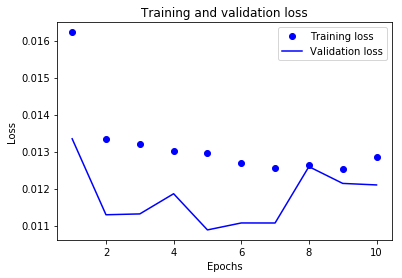

In [169]:
# the plot for errors vs epoch with both training and validation data
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# -----------------------------CONCLUSION------------------------------------------------------------------------------#

# on comparing the error metrics of all models(algorithms) 
# based on the L2 regularizartion applied dataset df2
# (because it gave lesser FNR on very model applied over it compared to df- without L2)

                      Logistic regression     Decision-Tress      Random-forest           KNN                   Naive-Bayes
accuracy score:      99.82550963952845 %   99.86594033280845 %  99.88934757628634 %    99.85530067668213 %   99.83189343320424 %
False-Negative-Rate: 96.42857142857143 %   45.23809523809524 %  61.904761904761905 %   78.57142857142857 %   86.9047619047619 %
true-positive-rate:  99.82550963952845 %   99.86594033280845 %  99.88934757628634 %    99.85530067668213 %   99.83189343320424 %
    
    # accuracy is highest in Decision trees 99.83189343320424 %
    # FNR is lowest in Decision trees too 45.23809523809524 % 
    # so the most suitable model for prediction over this dataset is 'Decision-trees'

In [16]:
!pip install imbalanced-learn

You are using pip version 18.1, however version 20.2.4 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
